<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/Practice_GLM%2BPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages(c("psych","glmnet"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




In [5]:
library(psych)
library(glmnet)  # for ridge regression
library(dplyr)   # for data cleaning

Loading required package: Matrix

Loaded glmnet 4.1-6


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
data("mtcars")

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”


Parallel analysis suggests that the number of factors =  NA  and the number of components =  2 


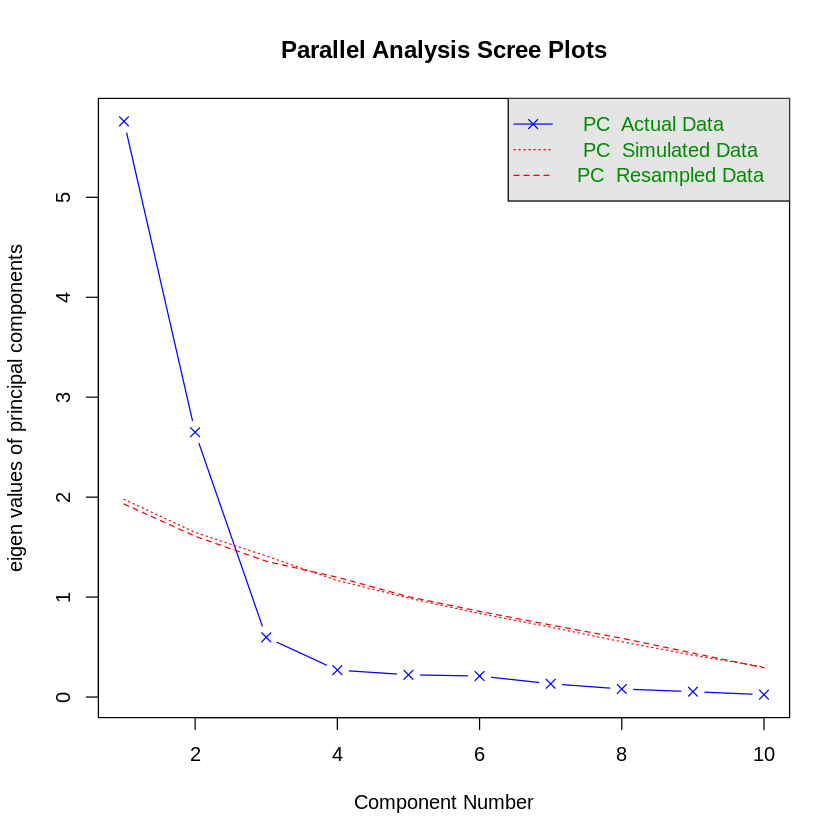

In [7]:
fa.parallel(mtcars %>% select(-mpg), fa="pc")

In [10]:
pc <- principal(mtcars %>% select(-mpg), nfactors = 2, rotate = "varimax")

In [11]:
pc

Principal Components Analysis
Call: principal(r = mtcars %>% select(-mpg), nfactors = 2, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       RC1   RC2   h2    u2 com
cyl   0.73 -0.64 0.94 0.061 2.0
disp  0.61 -0.73 0.91 0.089 1.9
hp    0.88 -0.32 0.88 0.118 1.3
drat -0.22  0.86 0.78 0.221 1.1
wt    0.46 -0.79 0.83 0.168 1.6
qsec -0.90 -0.16 0.84 0.159 1.1
vs   -0.83  0.30 0.78 0.223 1.3
am    0.07  0.92 0.85 0.153 1.0
gear  0.16  0.91 0.86 0.144 1.1
carb  0.86  0.09 0.75 0.255 1.0

                       RC1  RC2
SS loadings           4.21 4.20
Proportion Var        0.42 0.42
Cumulative Var        0.42 0.84
Proportion Explained  0.50 0.50
Cumulative Proportion 0.50 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.05 
 with the empirical chi square  8.45  with prob <  1 

Fit based upon off diagonal values = 0.99

In [15]:
mtcars %>% select(-mpg)

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [21]:
comp <- (as.matrix(mtcars %>% select(-mpg)))%*%pc$weights

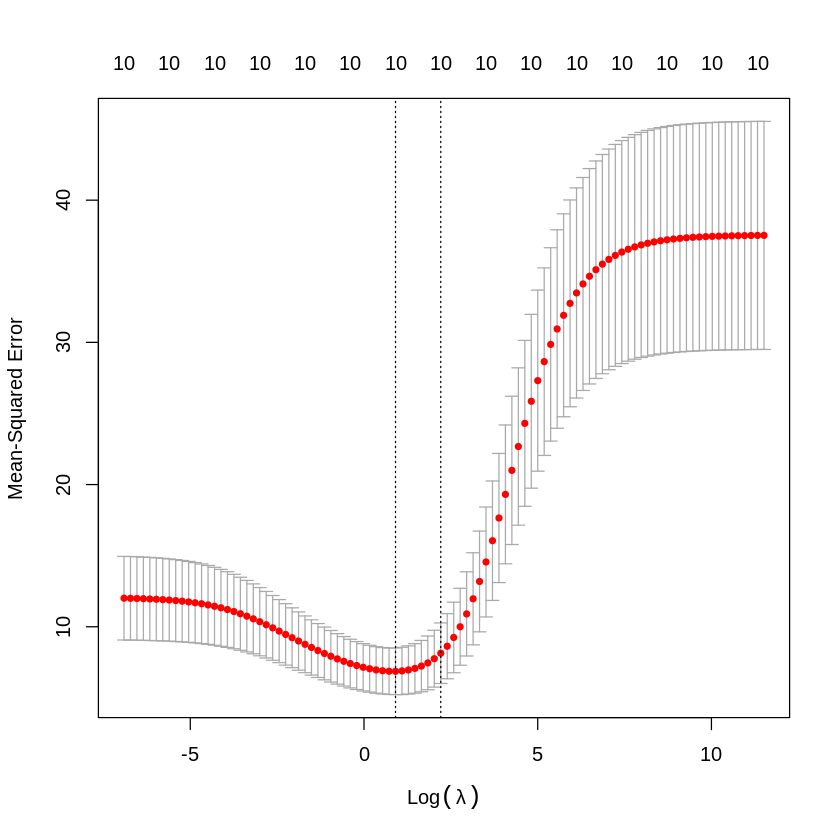

In [22]:

# Center y, X will be standardized in the modelling function
# y <- mtcars %>% select(mpg) %>% scale(center = TRUE, scale = FALSE) %>% as.matrix()
y <- mtcars %>% select(mpg) %>% scale(center = TRUE, scale = FALSE) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()


# Perform 10-fold cross-validation to select lambda ---------------------------
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
ridge_cv <- cv.glmnet(X, y, alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)
# Plot cross-validation results
plot(ridge_cv)

In [26]:
# Best cross-validated lambda
lambda_cv <- ridge_cv$lambda.min
# Fit final model, get its sum of squared residuals and multiple R-squared
model_cv <- glmnet(X, y, alpha = 0, lambda = lambda_cv, standardize = TRUE)
y_hat_cv <- predict(model_cv, X)
ssr_cv <- t(y - y_hat_cv) %*% (y - y_hat_cv)
rsq_ridge_cv <- cor(y, y_hat_cv)[1,1]^2

In [27]:
rsq_ridge_cv

[1] 0.7522684

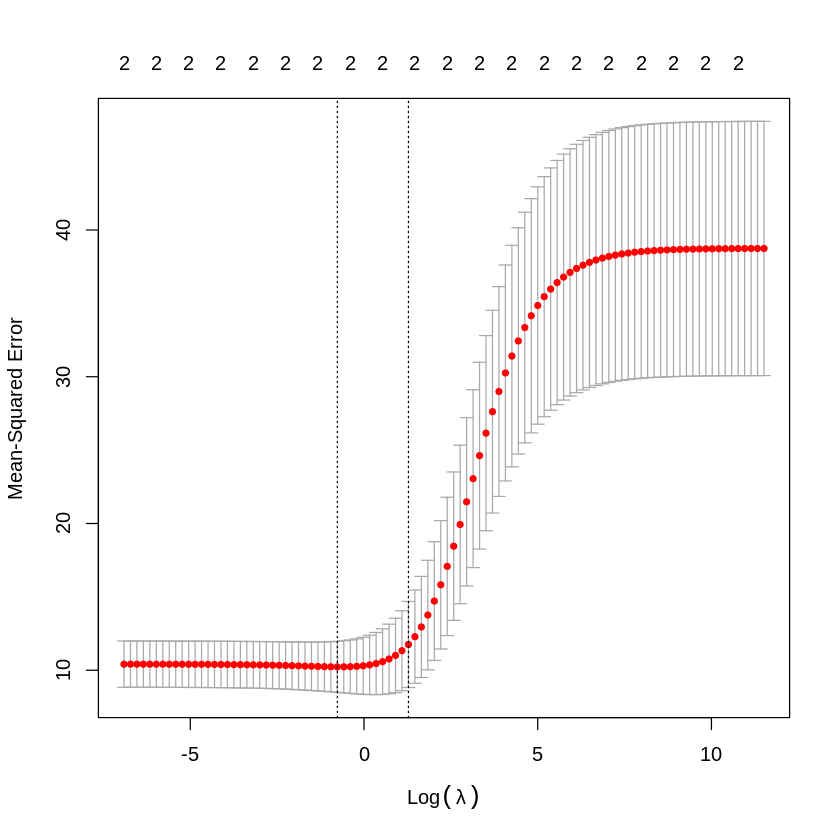

In [28]:

# Center y, X will be standardized in the modelling function
# y <- mtcars %>% select(mpg) %>% scale(center = TRUE, scale = FALSE) %>% as.matrix()
y <- mtcars %>% select(mpg) %>% scale(center = TRUE, scale = FALSE) %>% as.matrix()
X <- comp %>% as.matrix()


# Perform 10-fold cross-validation to select lambda ---------------------------
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
ridge_cv <- cv.glmnet(X, y, alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)
# Plot cross-validation results
plot(ridge_cv)

In [29]:
# Best cross-validated lambda
lambda_cv <- ridge_cv$lambda.min
# Fit final model, get its sum of squared residuals and multiple R-squared
model_cv <- glmnet(X, y, alpha = 0, lambda = lambda_cv, standardize = TRUE)
y_hat_cv <- predict(model_cv, X)
ssr_cv <- t(y - y_hat_cv) %*% (y - y_hat_cv)
rsq_ridge_cv <- cor(y, y_hat_cv)[1,1]^2

In [30]:
rsq_ridge_cv

[1] 0.7522792